In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mplt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("college_student_placement_dataset.csv")

In [3]:
print(df)

     College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0       CLG0030  107             6.61  6.28                     8   
1       CLG0061   97             5.52  5.37                     8   
2       CLG0036  109             5.36  5.83                     9   
3       CLG0055  122             5.47  5.75                     6   
4       CLG0004   96             7.91  7.69                     7   
...         ...  ...              ...   ...                   ...   
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                       No                       8                     8   
1                  

In [4]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [7]:
X = df[['Academic_Performance']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
print("Original Academic Performance Scores :- \n",df['Academic_Performance'])
print("\n\n")
print("Academic Performance Scores after Scaling(normalization) :- \n", X_scaled)

Original Academic Performance Scores :- 
 0       8
1       8
2       9
3       6
4       7
       ..
9995    4
9996    7
9997    3
9998    3
9999    8
Name: Academic_Performance, Length: 10000, dtype: int64



Academic Performance Scores after Scaling(normalization) :- 
 [[ 0.85392098]
 [ 0.85392098]
 [ 1.20194877]
 ...
 [-0.88621796]
 [-0.88621796]
 [ 0.85392098]]


In [9]:
df['Academic_Performance'] = X_scaled

In [10]:
print(df['Academic_Performance'])

0       0.853921
1       0.853921
2       1.201949
3       0.157865
4       0.505893
          ...   
9995   -0.538190
9996    0.505893
9997   -0.886218
9998   -0.886218
9999    0.853921
Name: Academic_Performance, Length: 10000, dtype: float64


In [11]:
X2 = df[['IQ']]
scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)

In [12]:
print("Original IQ Scores :- \n",df['IQ'])
print("\n\n")
print("IQ Scores after Scaling(normalization) :- \n", X2_scaled)

Original IQ Scores :- 
 0       107
1        97
2       109
3       122
4        96
       ... 
9995    119
9996     70
9997     89
9998    107
9999    109
Name: IQ, Length: 10000, dtype: int64



IQ Scores after Scaling(normalization) :- 
 [[0.56410256]
 [0.47863248]
 [0.58119658]
 ...
 [0.41025641]
 [0.56410256]
 [0.58119658]]


In [13]:
df['IQ'] = X2_scaled
print(df['IQ'])


0       0.564103
1       0.478632
2       0.581197
3       0.692308
4       0.470085
          ...   
9995    0.666667
9996    0.247863
9997    0.410256
9998    0.564103
9999    0.581197
Name: IQ, Length: 10000, dtype: float64


In [14]:
df['IQ_binning'] = pd.cut(df['IQ'], bins=3, labels=['Low', 'Medium', 'High'])

df['AP_binning'] = pd.cut(df['Academic_Performance'], bins=3, labels=['Poor', 'Average', 'Good'])

In [15]:
pivot = pd.crosstab(df['IQ_binning'], df['AP_binning'])
print(pivot)

AP_binning  Poor  Average  Good
IQ_binning                     
Low          374      346   320
Medium      3152     2349  2425
High         427      296   311


Text(0, 0.5, 'Academic Performance')

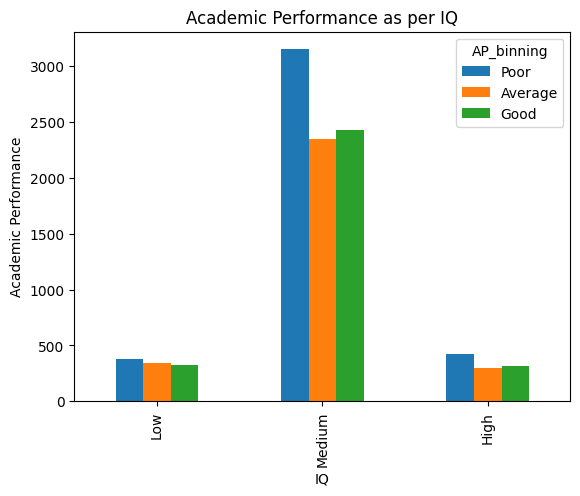

In [16]:
pivot.plot(kind='bar')
mplt.title('Academic Performance as per IQ')
mplt.xlabel('IQ')
mplt.ylabel('Academic Performance')

In [17]:
print("Mean of IQ = ", df['IQ'].mean())
print("Median of IQ = ", df['IQ'].median())
print("Mode of IQ = ", df['IQ'].mode()[0])

Mean of IQ =  0.49975897435897443
Median of IQ =  0.4957264957264958
Mode of IQ =  0.4957264957264958


In [18]:
SD_IQ = df['IQ'].std()
print("Standard Deviation of IQ :- \n", SD_IQ)

Standard Deviation of IQ :- 
 0.12865898705943707


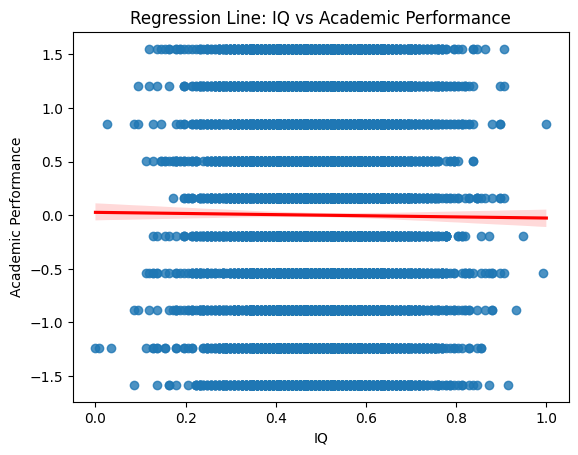

In [19]:
sns.regplot(x='IQ', y = 'Academic_Performance', data=df, line_kws={"color": "red"})

mplt.title("Regression Line: IQ vs Academic Performance")
mplt.xlabel("IQ")
mplt.ylabel("Academic Performance")
mplt.show()